# 1. 데이터 불러오기와 데이터셋 나누기

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('Fvote.csv', encoding='utf-8')

In [4]:
data.head()

,Unnamed: 0,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,0,1,0,0,0,0,1,1.0,0.666667,0.666667,0.25,0.25,0.75,1,2
1,1,0,1,0,0,1,0,0,0.5,0.666667,0.666667,0.25,0.75,0.50,0,3
2,2,0,1,0,1,0,0,0,0.0,0.333333,1.000000,0.00,0.50,0.45,1,4
3,3,1,0,0,0,0,1,0,0.5,0.000000,0.666667,1.00,0.75,0.40,1,1
4,4,0,1,0,0,0,1,0,0.0,0.333333,1.000000,0.75,0.50,0.35,1,1


In [5]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [6]:
y=data[['parties']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

In [9]:
X_train.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention
29,1,0,0,0,0,1,0,0.5,1.000000,1.000000,0.50,0.50,0.30
19,1,0,0,0,1,0,0,1.0,1.000000,0.666667,0.50,0.50,0.50
185,1,0,0,0,0,1,0,0.0,0.000000,0.000000,0.50,0.75,0.45
95,0,1,0,0,0,1,0,0.5,0.666667,0.333333,0.25,0.50,0.55
67,0,1,0,0,0,0,1,1.0,1.000000,0.666667,0.00,0.25,0.25


In [10]:
y_train.head()

,parties
29,3
19,1
185,2
95,4
67,2


In [11]:
X_test.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention
30,0,1,0,0,0,1,0,0.0,0.666667,0.666667,0.25,0.25,0.35
173,0,1,1,0,0,0,0,0.5,1.000000,1.000000,0.50,0.75,0.50
140,1,0,0,0,0,1,0,0.5,0.000000,0.333333,0.50,0.25,0.50
75,0,1,0,0,0,0,1,1.0,0.666667,0.333333,0.75,0.75,0.50
60,0,1,0,0,1,0,0,0.0,0.666667,0.666667,0.50,0.75,0.50


In [12]:
y_test.head()

,parties
30,2
173,3
140,4
75,1
60,3


# 2. Grid Search 

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [17]:
grid_search.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [18]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 8}


In [19]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.392


In [20]:
#Test Data에 대한 예측률을 살펴보자

In [21]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.415


In [22]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [23]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002792,3.988746e-04,0.001795,0.000399,1,{'n_neighbors': 1},0.363636,0.272727,0.419355,0.387097,...,0.373418,0.057183,4,0.992,1.000,0.992126,0.992126,1.000000,0.995250,0.003878
1,0.002992,6.303746e-04,0.001197,0.000399,2,{'n_neighbors': 2},0.363636,0.303030,0.322581,0.258065,...,0.316456,0.035114,10,0.680,0.688,0.669291,0.669291,0.687500,0.678817,0.008278
2,0.002593,4.885781e-04,0.001397,0.000489,3,{'n_neighbors': 3},0.424242,0.272727,0.354839,0.354839,...,0.360759,0.052597,6,0.608,0.656,0.629921,0.598425,0.648438,0.628157,0.022271
3,0.002992,1.092581e-03,0.001795,0.000746,4,{'n_neighbors': 4},0.363636,0.303030,0.290323,0.322581,...,0.335443,0.040108,9,0.600,0.600,0.637795,0.598425,0.632812,0.613807,0.017632
4,0.002992,6.312035e-04,0.002195,0.000747,5,{'n_neighbors': 5},0.515152,0.303030,0.290323,0.354839,...,0.367089,0.081373,5,0.560,0.584,0.622047,0.622047,0.593750,0.596369,0.023670
5,0.003990,6.307517e-04,0.001795,0.000399,6,{'n_neighbors': 6},0.393939,0.333333,0.322581,0.290323,...,0.341772,0.035952,8,0.528,0.592,0.590551,0.551181,0.554688,0.563284,0.024631
6,0.002793,7.473473e-04,0.002194,0.000400,7,{'n_neighbors': 7},0.454545,0.303030,0.387097,0.354839,...,0.379747,0.051068,2,0.512,0.552,0.543307,0.566929,0.500000,0.534847,0.025025
7,0.002393,4.888506e-04,0.001795,0.000400,8,{'n_neighbors': 8},0.424242,0.393939,0.451613,0.290323,...,0.392405,0.054365,1,0.544,0.560,0.543307,0.543307,0.523438,0.542810,0.011599
8,0.002992,6.468134e-07,0.002194,0.000399,9,{'n_neighbors': 9},0.393939,0.363636,0.354839,0.354839,...,0.379747,0.029748,2,0.488,0.504,0.535433,0.535433,0.500000,0.512573,0.019394
9,0.002792,7.463275e-04,0.001397,0.000488,10,{'n_neighbors': 10},0.333333,0.303030,0.322581,0.354839,...,0.348101,0.044563,7,0.496,0.512,0.519685,0.559055,0.507812,0.518911,0.021485


In [24]:
result_grid.to_csv('result_grid.csv', sep=',', encoding='utf-8')

In [25]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
from scipy.stats import randint

In [28]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5,return_train_score=True)

In [31]:
random_search.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BB3A962320>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [32]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'n_neighbors': 18}


In [33]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.418


In [34]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.321


In [35]:
result_random = random_search.cv_results_

In [36]:
result_random = pd.DataFrame(result_random)

In [37]:
result_random.to_csv('result_random.csv', sep=',', encoding='utf-8')

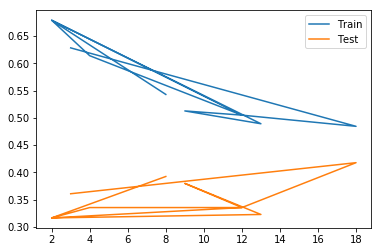

In [38]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

# 4. 모델평가

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn3=KNeighborsClassifier(n_neighbors=8)

In [41]:
knn3.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
pred_train=knn3.predict(X_train)

In [44]:
pred_train

array([2, 1, 4, 4, 2, 4, 2, 4, 4, 4, 4, 1, 4, 2, 4, 4, 1, 1, 2, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 2, 1, 4, 4, 2, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4,
       1, 4, 4, 4, 4, 1, 4, 2, 4, 1, 1, 2, 4, 4, 1, 2, 4, 1, 1, 4, 4, 2,
       2, 4, 4, 1, 2, 1, 2, 2, 2, 4, 3, 2, 1, 4, 1, 4, 4, 4, 2, 4, 4, 3,
       4, 3, 4, 1, 4, 4, 1, 1, 4, 4, 2, 1, 4, 1, 1, 1, 4, 1, 4, 1, 4, 2,
       4, 1, 4, 1, 2, 1, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 2, 3, 4, 3, 4, 4,
       1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4,
       2, 4, 4, 4], dtype=int64)

In [45]:
confusion_train=confusion_matrix(y_train, pred_train)

In [46]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[20  0  2 15]
 [ 3 15  0 19]
 [ 3  3  2 11]
 [10  6  1 48]]


In [47]:
pred_test=knn3.predict(X_test)

In [48]:
pred_test

array([2, 2, 4, 4, 1, 1, 1, 2, 4, 4, 4, 4, 4, 3, 4, 1, 4, 4, 3, 1, 4, 4,
       1, 2, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 1,
       4, 4, 4, 2, 1, 3, 2, 4, 4], dtype=int64)

In [49]:
confusion_test=confusion_matrix(y_test, pred_test)

In [50]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 5  0  1  7]
 [ 2  4  1  9]
 [ 3  1  0  2]
 [ 3  1  1 13]]


In [51]:
from sklearn.metrics import f1_score

In [52]:
f1=f1_score(y_test, pred_test, average="micro" )  #이항분류일 경우에만 binary를 사용함
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)
# Parameter : average
# string, [None, ‘binary’ (default), ‘micro’, ‘macro’, ‘samples’, ‘weighted’]
# is required for multiclass/multilabel targets.
# If None, the scores for each class are returned.
# Otherwise, this determines the type of averaging performed on the data:
# 'binary': Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
# 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
# 'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
# This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
# 'samples': Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

In [53]:
print("micro f1 score: ", f1)  #(5+4+0+13)/53

micro f1 score:  0.41509433962264153


In [54]:
f2=f1_score(y_test, pred_test, average="macro" )

In [55]:
print("macro f1 score: ", f2)

macro f1 score:  0.3197159982874269


In [56]:
from sklearn.metrics import classification_report

In [57]:
cfreport=classification_report(y_test, pred_test)

In [58]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           1       0.38      0.38      0.38        13
           2       0.67      0.25      0.36        16
           3       0.00      0.00      0.00         6
           4       0.42      0.72      0.53        18

    accuracy                           0.42        53
   macro avg       0.37      0.34      0.32        53
weighted avg       0.44      0.42      0.38        53



In [59]:
#accuracy
22/53

0.41509433962264153

In [60]:
# macro average of precision
(0.38+0.67+0.00+0.42)/4

0.3675

In [61]:
# weighted average of precision
(0.38*13 + 0.67*16 + 0.00*6 + 0.42*18)/53

0.4381132075471698

In [62]:
(0.38+0.25+0.00+0.72)/4

0.3375

In [63]:
(0.38*13+0.25*16+0.00*6+0.72*18)/53

0.4132075471698113

In [64]:
(0.38+0.36+0.00+0.53)/4

0.3175

In [65]:
(0.38*13+0.36*16+0.00*0+0.53*18)/53

0.38188679245283025